In [1]:
import torchmetrics
import torch

/usr0/home/vishwaja/miniconda3/envs/ldm/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from ldm.modules.encoders import mae

In [6]:
# build model
model = mae.vit_huge_patch14(num_classes=0, get_patch_embeds=True)
# load model
# checkpoint = torch.load("mae_weights/mae_pretrain_vit_huge.pth", map_location='cpu')
# msg = model.load_state_dict(checkpoint['model'], strict=False)
# print(msg)

In [7]:
print(model)

VisionTransformer(
  (patch_embed): PatchEmbed(
    (proj): Conv2d(3, 1280, kernel_size=(14, 14), stride=(14, 14))
  )
  (pos_drop): Dropout(p=0.0, inplace=False)
  (blocks): ModuleList(
    (0-31): 32 x Block(
      (norm1): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
      (attn): Attention(
        (qkv): Linear(in_features=1280, out_features=3840, bias=True)
        (attn_drop): Dropout(p=0.0, inplace=False)
        (proj): Linear(in_features=1280, out_features=1280, bias=True)
        (proj_drop): Dropout(p=0.0, inplace=False)
      )
      (drop_path): Identity()
      (norm2): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
      (mlp): Mlp(
        (fc1): Linear(in_features=1280, out_features=5120, bias=True)
        (act): GELU(approximate='none')
        (fc2): Linear(in_features=5120, out_features=1280, bias=True)
        (drop): Dropout(p=0.0, inplace=False)
      )
    )
  )
  (norm): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
  (head): Identi

In [8]:
inp = torch.randn(1, 3, 224, 224)
out = model(inp)
print(out.shape)

torch.Size([1, 256, 1280])


In [5]:
from ldm.modules.encoders import vision_transformers

In [16]:
model1 = vision_transformers.__dict__["vit_huge"](
    img_size=[224], patch_size=14
)
print(model1)

VisionTransformer(
  (patch_embed): PatchEmbed(
    (proj): Conv2d(3, 1280, kernel_size=(14, 14), stride=(14, 14))
  )
  (pos_drop): Dropout(p=0.0, inplace=False)
  (blocks): ModuleList(
    (0-31): 32 x Block(
      (norm1): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
      (attn): Attention(
        (qkv): Linear(in_features=1280, out_features=3840, bias=True)
        (attn_drop): Dropout(p=0.0, inplace=False)
        (proj): Linear(in_features=1280, out_features=1280, bias=True)
        (proj_drop): Dropout(p=0.0, inplace=False)
      )
      (drop_path): Identity()
      (norm2): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
      (mlp): Mlp(
        (fc1): Linear(in_features=1280, out_features=5120, bias=True)
        (act): GELU(approximate='none')
        (fc2): Linear(in_features=5120, out_features=1280, bias=True)
        (drop): Dropout(p=0.0, inplace=False)
      )
    )
  )
  (norm): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
  (head): Identi

In [17]:
model1(inp).shape

torch.Size([1, 256, 1280])

In [2]:
ckpt = torch.load('logs/2024-04-21T12-46-51_afhq-ldm-kl-16-jepa/checkpoints/last.ckpt')

In [3]:
print(ckpt.keys())

dict_keys(['epoch', 'global_step', 'pytorch-lightning_version', 'state_dict', 'callbacks', 'optimizer_states', 'lr_schedulers'])


In [5]:
ckpt['pytorch-lightning_version']

'1.4.2'

In [4]:
ckpt['epoch'] 

8

In [7]:
ckpt['optimizer_states'][0]['param_groups'] 

[{'lr': 3.375e-06,
  'betas': (0.5, 0.9),
  'eps': 1e-08,
  'weight_decay': 0,
  'amsgrad': False,
  'maximize': False,
  'foreach': None,
  'capturable': False,
  'differentiable': False,
  'fused': None,
  'params': [0,
   1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19,
   20,
   21,
   22,
   23,
   24,
   25,
   26,
   27,
   28,
   29,
   30,
   31,
   32,
   33,
   34,
   35,
   36,
   37,
   38,
   39,
   40,
   41,
   42,
   43,
   44,
   45,
   46,
   47,
   48,
   49,
   50,
   51,
   52,
   53,
   54,
   55,
   56,
   57,
   58,
   59,
   60,
   61,
   62,
   63,
   64,
   65,
   66,
   67,
   68,
   69,
   70,
   71,
   72,
   73,
   74,
   75,
   76,
   77,
   78,
   79,
   80,
   81,
   82,
   83,
   84,
   85,
   86,
   87,
   88,
   89,
   90,
   91,
   92,
   93,
   94,
   95,
   96,
   97,
   98,
   99,
   100,
   101,
   102,
   103,
   104,
   105,
   106,
   107,
   108,
   109,
   110,
   111

In [6]:
ckpt['lr_schedulers']

[{'factor': 0.5,
  'min_lrs': [0],
  'patience': 10000,
  'verbose': False,
  'cooldown': 0,
  'cooldown_counter': 0,
  'mode': 'min',
  'threshold': 0.0001,
  'threshold_mode': 'rel',
  'best': 54716.06640625,
  'num_bad_epochs': 4154,
  'mode_worse': inf,
  'eps': 1e-08,
  'last_epoch': 80792,
  '_last_lr': [3.375e-06]}]

In [8]:
# change lr
ckpt['optimizer_states'][0]['param_groups'][0]['lr'] = 4.32e-4
# # change schedulers
# ckpt['lr_schedulers'][0]['patience'] = 10000
# ckpt['lr_schedulers'][1]['patience'] = 10000

In [9]:
ckpt['optimizer_states'][0]['param_groups'] 

[{'lr': 0.000432,
  'betas': (0.5, 0.9),
  'eps': 1e-08,
  'weight_decay': 0,
  'amsgrad': False,
  'maximize': False,
  'foreach': None,
  'capturable': False,
  'differentiable': False,
  'fused': None,
  'params': [0,
   1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19,
   20,
   21,
   22,
   23,
   24,
   25,
   26,
   27,
   28,
   29,
   30,
   31,
   32,
   33,
   34,
   35,
   36,
   37,
   38,
   39,
   40,
   41,
   42,
   43,
   44,
   45,
   46,
   47,
   48,
   49,
   50,
   51,
   52,
   53,
   54,
   55,
   56,
   57,
   58,
   59,
   60,
   61,
   62,
   63,
   64,
   65,
   66,
   67,
   68,
   69,
   70,
   71,
   72,
   73,
   74,
   75,
   76,
   77,
   78,
   79,
   80,
   81,
   82,
   83,
   84,
   85,
   86,
   87,
   88,
   89,
   90,
   91,
   92,
   93,
   94,
   95,
   96,
   97,
   98,
   99,
   100,
   101,
   102,
   103,
   104,
   105,
   106,
   107,
   108,
   109,
   110,
   111,

In [10]:
torch.save(ckpt, 'logs/2024-04-06T20-05-45_autoencoder_kl_16x16x1280/checkpoints/last.ckpt')

In [3]:
data_dir = "/usr1/vishwaja/pgm/datasets/mscoco2017"

In [2]:
import json

with open(f"{data_dir}/annotations/instances_val2017.json") as f:
    data = json.load(f)

data.keys()

dict_keys(['info', 'licenses', 'images', 'annotations', 'categories'])

In [3]:
for key in data.keys():
    print(key, len(data[key]))

info 6
licenses 8
images 5000
annotations 36781
categories 80


In [ ]:
# print images with captions
for i in range(10):
    print(data['images'][1000+i])
    print(data['annotations'][1000+i])
    print()

In [5]:
import json
# read caption json file
with open(f"{data_dir}/annotations/captions_val2017.json") as f:
    captions = json.load(f)

In [7]:
captions.keys()

dict_keys(['info', 'licenses', 'images', 'annotations'])

In [11]:
# print images and captions
for i in range(10):
    print(captions['images'][i])
    print(captions['annotations'][i])

{'license': 4, 'file_name': '000000397133.jpg', 'coco_url': 'http://images.cocodataset.org/val2017/000000397133.jpg', 'height': 427, 'width': 640, 'date_captured': '2013-11-14 17:02:52', 'flickr_url': 'http://farm7.staticflickr.com/6116/6255196340_da26cf2c9e_z.jpg', 'id': 397133}
{'image_id': 179765, 'id': 38, 'caption': 'A black Honda motorcycle parked in front of a garage.'}
{'license': 1, 'file_name': '000000037777.jpg', 'coco_url': 'http://images.cocodataset.org/val2017/000000037777.jpg', 'height': 230, 'width': 352, 'date_captured': '2013-11-14 20:55:31', 'flickr_url': 'http://farm9.staticflickr.com/8429/7839199426_f6d48aa585_z.jpg', 'id': 37777}
{'image_id': 179765, 'id': 182, 'caption': 'A Honda motorcycle parked in a grass driveway'}
{'license': 4, 'file_name': '000000252219.jpg', 'coco_url': 'http://images.cocodataset.org/val2017/000000252219.jpg', 'height': 428, 'width': 640, 'date_captured': '2013-11-14 22:32:02', 'flickr_url': 'http://farm4.staticflickr.com/3446/3232237447_

In [1]:
captions

NameError: name 'captions' is not defined

In [ ]:
# print unique images and number of captions per image
img2caption = {}
for cap in captions['annotations']:
    img2caption[cap['image_id']] = img2caption.get(cap['image_id'], 0) + 1

print(len(img2caption))
for key in img2caption.keys():
    print(key, img2caption[key])

# each image seems to have 5 captions  

In [19]:
import numpy as np

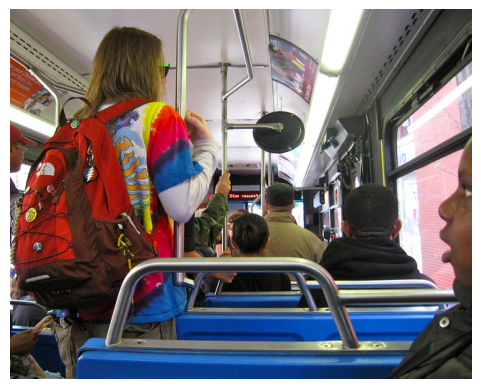

a man with an orange backpack standing on a bus


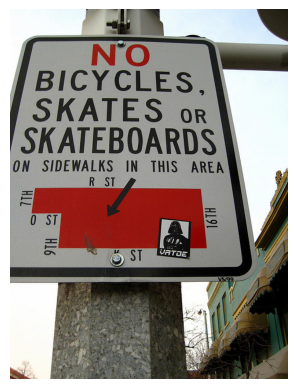

A sign prohibiting skating on the sidewalk with black and red writing.


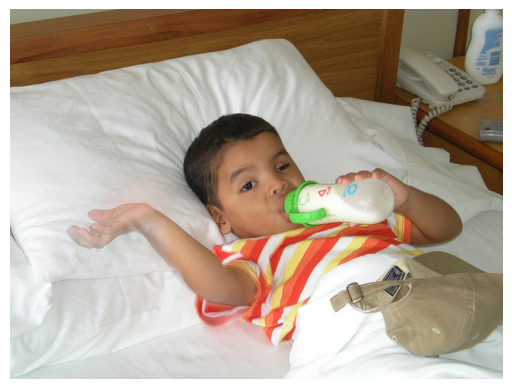

A young boy lying in a bed with a sippy cup.


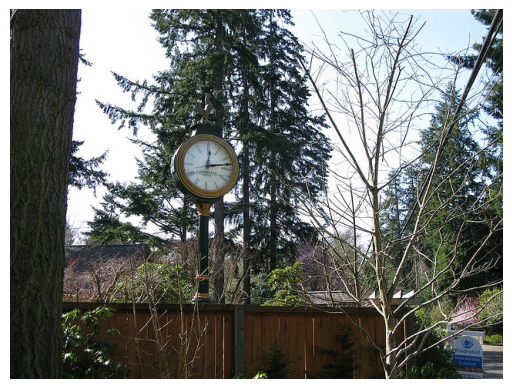

A tall clock sitting next to a fence and a forest.


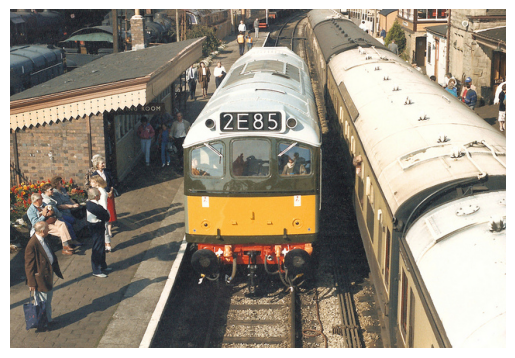

A train parked at a train stop next to another train.


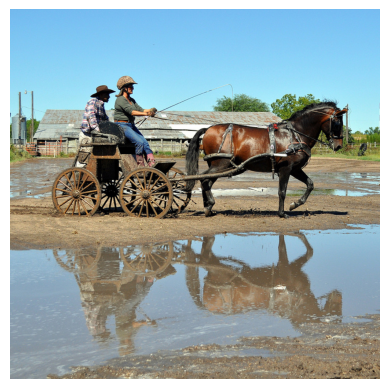

Some people sit in a carriage pulled by a horse. 


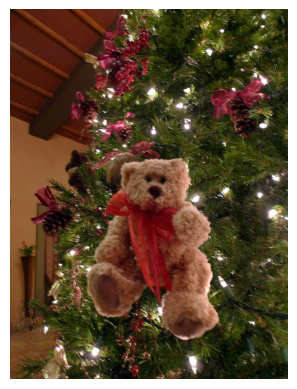

A teddy bear wearing a red bow that is sitting on a Christmas tree.


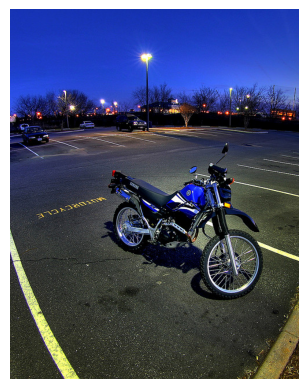

A lone motorcycle is parked in the lighted parking lot.


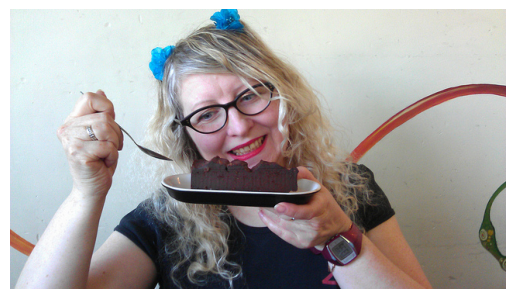

A woman with glasses eating a piece of cake.


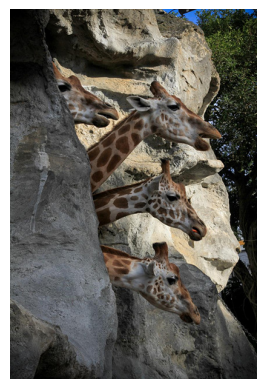

Four giraffes sticking their heads through a hole in some large rocks.


In [21]:
# create plot of images with captions
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img_dir = f"{data_dir}/val2017"
img2filename = {}
for img in captions['images']:
    img2filename[img['id']] = img['file_name']

for i in range(10):
    idx = np.random.randint(0, len(captions['annotations']))
    img_id = captions['annotations'][idx]['image_id']
    img_filename = img2filename[img_id]
    img = mpimg.imread(f"{img_dir}/{img_filename}")
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    print(captions['annotations'][idx]['caption'])